<a href="https://colab.research.google.com/github/WojtekSza/Data_engineer_entry_task/blob/feature/Data_engineer_entry_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Data Engineer Entry Task**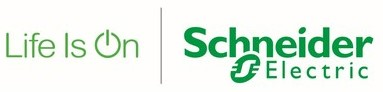

In [5]:
import pandas as pd
import requests
import gzip
import json
import numpy as np

# SCRIPT TO DOWNLOAD DATA:

In [31]:
f = open("data_ingestion.txt", "w")
f.close()

In [ ]:
year ='2015'
month='01'
for i in range(1,29):
    for ii in range (0,24): 
      if i<10:
        url="https://data.gharchive.org/"+year+"-"+month+"-0"+str(i)+'-'+str(ii)+".json.gz"
        response = requests.get(url)
        data=gzip.decompress(response.content)
        data=data.decode("utf-8")
        #data=data.split('\n')
        #data.pop()
        #all_data.extend(data)
        with open("data_ingestion.txt",'a',encoding = 'utf-8') as f:
            f.write(data)
        print('day :'+str(i)+' hour :'+str(ii))
      else:
        url="https://data.gharchive.org/"+year+"-"+month+"-0"+str(i)+'-'+str(ii)+".json.gz"
        response = requests.get(url)
        data=gzip.decompress(response.content)
        data=data.decode("utf-8")
        #data=data.split('\n')
        #data.pop()
        #all_data.extend(data)
        with open("data_ingestion.txt",'a',encoding = 'utf-8') as f:
            f.write(data)        
        print('day :'+str(i)+' hour :'+str(ii))

In [7]:
database=[]
with open("data_ingestion.txt") as fileobject:
    for line in fileobject:
      data_json = json.loads(line)
      database.append([data_json['created_at'],data_json['repo']['id'],data_json['repo']['name'],data_json['actor']['id'],data_json['actor']['login'],data_json['type']])

In [8]:
dataframe=pd.DataFrame(database,columns=['created_at','repo_id','repo','user_id','user','type'])
dataframe['created_at']=pd.to_datetime(dataframe['created_at']).dt.date
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12605632 entries, 0 to 12605631
Data columns (total 6 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   created_at  object
 1   repo_id     int64 
 2   repo        object
 3   user_id     int64 
 4   user        object
 5   type        object
dtypes: int64(2), object(4)
memory usage: 577.0+ MB


# REPOSITORY AGGREGATION:

In [9]:
dataframe_repo=dataframe.copy()

In [10]:
dataframe_repo['type'].unique()

array(['PushEvent', 'CreateEvent', 'IssueCommentEvent',
       'PullRequestReviewCommentEvent', 'PullRequestEvent', 'ForkEvent',
       'WatchEvent', 'DeleteEvent', 'IssuesEvent', 'CommitCommentEvent',
       'GollumEvent', 'ReleaseEvent', 'MemberEvent', 'PublicEvent'],
      dtype=object)

In [11]:
dataframe_repo=dataframe_repo[(dataframe_repo['type']=='CreateEvent') | (dataframe_repo['type']=='ForkEvent') | (dataframe_repo['type']=='IssuesEvent') | (dataframe_repo['type']=='PullRequestEvent')]

In [12]:
dataframe_repo_pivot=dataframe_repo.pivot_table(index=['created_at','repo_id','repo'], columns='type', values='user',aggfunc='count')

In [14]:
dataframe_repo_pivot.to_csv('results_repo_aggregation.csv')

In [27]:
dataframe_repo_pivot

type                                                   CreateEvent  ForkEvent  \
created_at repo_id  repo                                                        
2015-01-01 27       rubinius/rubinius                          NaN        NaN   
           426      haml/haml                                  NaN        NaN   
           912      collectiveidea/awesome_nested_set          NaN        NaN   
           1252     lsegal/yard                                NaN        1.0   
           1318     sprinkle-tool/sprinkle                     NaN        1.0   
...                                                            ...        ...   
2015-01-28 29994669 ErikaLim/picApp                            1.0        NaN   
           29994673 vladolalik/discgolf                        1.0        NaN   
           29994674 ebrengle/api_practice                      1.0        NaN   
           29994678 kasima/double_subs                         1.0        NaN   
           29994679 katzedon/katzedon.github.io                1.0        NaN   

type                                                   IssuesEvent  \
created_at repo_id  repo                                             
2015-01-01 27       rubinius/rubinius                         13.0   
           426      haml/haml                                  1.0   
           912      collectiveidea/awesome_nested_set          NaN   
           1252     lsegal/yard                                1.0   
           1318     sprinkle-tool/sprinkle                     NaN   
...                                                            ...   
2015-01-28 29994669 ErikaLim/picApp                            NaN   
           29994673 vladolalik/discgolf                        NaN   
           29994674 ebrengle/api_practice                      NaN   
           29994678 kasima/double_subs                         NaN   
           29994679 katzedon/katzedon.github.io                NaN   

type                                                   PullRequestEvent  
created_at repo_id  repo                                                 
2015-01-01 27       rubinius/rubinius                               NaN  
           426      haml/haml                                       NaN  
           912      collectiveidea/awesome_nested_set               3.0  
           1252     lsegal/yard                                     1.0  
           1318     sprinkle-tool/sprinkle                          NaN  
...                                                                 ...  
2015-01-28 29994669 ErikaLim/picApp                                 NaN  
           29994673 vladolalik/discgolf                             NaN  
           29994674 ebrengle/api_practice                           NaN  
           29994678 kasima/double_subs                              NaN  
           29994679 katzedon/katzedon.github.io                     NaN  

[1485910 rows x 4 columns]

# USER AGGREGATION:

In [16]:
dataframe_users=dataframe.copy()

In [19]:
dataframe_users=dataframe_users[(dataframe_users['type']=='CreateEvent') | (dataframe_users['type']=='IssuesEvent') | (dataframe_users['type']=='PullRequestEvent')]

In [21]:
dataframe_users_pivot=dataframe_users.pivot_table(index=['created_at','user_id','user'], columns='type', values='repo',aggfunc='count')

In [23]:
dataframe_users_pivot.to_csv('results_user_aggregation.csv')

In [30]:
dataframe_users_pivot

type                                CreateEvent  IssuesEvent  PullRequestEvent
created_at user_id  user                                                      
2015-01-01 100      willcodeforfoo          NaN          1.0               NaN
           137      josh                    1.0          NaN               NaN
           141      technomancy             NaN          1.0               NaN
           224      rdempsey                1.0          NaN               NaN
           233      tdreyno                 NaN          1.0               NaN
...                                         ...          ...               ...
2015-01-28 10749479 bivvend                 1.0          NaN               NaN
           10749484 katbetz                 1.0          NaN               NaN
           10749489 oleman204               1.0          NaN               NaN
           10749501 estufas                 1.0          NaN               NaN
           10749502 EmmaLii                 1.0          NaN               NaN

[1039730 rows x 3 columns]

# END